In [626]:
# packages used in this tutorial 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# keras is only to get boston housing data
# boston housing is also here: from sklearn.datasets import load_boston
#import tensorflow as tf
from tensorflow import keras

# gradient boosting 
from xgboost import XGBRegressor

# random forest
from sklearn.ensemble import RandomForestRegressor

# evaluation metrics
from sklearn.metrics import mean_squared_error

In [627]:
weather_df = pd.read_csv('data2.csv')
weather_df.head()

,PRECTOTCORR,QV2M,PS,WS50M,T2M,TS,ALLSKY_SFC_SW_DWN,WS10M,ALLSKY_SFC_UV_INDEX,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_PAR_TOT,WS2M
0,0.00,5.00,102.31,5.64,5.01,5.73,1.78,4.37,0.16,43.41,34.7,3.45
1,0.05,6.29,101.94,7.93,7.73,7.12,1.74,5.63,0.18,44.10,34.5,4.35
2,2.75,7.14,101.70,7.69,9.68,8.51,1.49,5.07,0.20,44.27,30.3,3.78
3,12.34,8.12,100.74,12.53,11.35,9.63,1.12,9.12,0.18,43.63,23.5,7.01
4,4.00,3.42,101.91,9.95,2.76,5.51,2.62,8.23,0.17,43.88,49.2,6.63


In [628]:
weather_df_num=weather_df.loc[:,[ 'QV2M', 'PS', 'WS50M','T2M','TS','ALLSKY_SFC_SW_DWN','WS10M','ALLSKY_SFC_UV_INDEX','CLRSKY_SFC_PAR_TOT','ALLSKY_SFC_PAR_TOT','WS2M']] #want to predict PRCP from the rest
weather_df_num.head()#seperate precipitation from AWND(Monthly Average Wind Speed),HDSD(Heating Degree Days (season-to-date)),Snowfall and TAVG(Average Temperature)

,QV2M,PS,WS50M,T2M,TS,ALLSKY_SFC_SW_DWN,WS10M,ALLSKY_SFC_UV_INDEX,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_PAR_TOT,WS2M
0,5.00,102.31,5.64,5.01,5.73,1.78,4.37,0.16,43.41,34.7,3.45
1,6.29,101.94,7.93,7.73,7.12,1.74,5.63,0.18,44.10,34.5,4.35
2,7.14,101.70,7.69,9.68,8.51,1.49,5.07,0.20,44.27,30.3,3.78
3,8.12,100.74,12.53,11.35,9.63,1.12,9.12,0.18,43.63,23.5,7.01
4,3.42,101.91,9.95,2.76,5.51,2.62,8.23,0.17,43.88,49.2,6.63


In [629]:
X = weather_df.loc[:,['QV2M', 'PS', 'WS50M','T2M','TS','ALLSKY_SFC_SW_DWN','WS10M','ALLSKY_SFC_UV_INDEX','CLRSKY_SFC_PAR_TOT','ALLSKY_SFC_PAR_TOT','WS2M']]
Y = weather_df.loc[:,'PRECTOTCORR']

X_train, X_test,Y_train, Y_test=train_test_split(X,Y, test_size=0.2,random_state=100)
mean=X.mean()
std=X.std()
X_train_n=(X_train-mean)/std
X_test_n=(X_test-mean)/std
X_train_n.head()

,QV2M,PS,WS50M,T2M,TS,ALLSKY_SFC_SW_DWN,WS10M,ALLSKY_SFC_UV_INDEX,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_PAR_TOT,WS2M
7620,0.798525,-0.044085,1.023715,0.543400,0.383821,-1.152446,0.612097,-0.901784,-1.071277,-1.126210,0.504667
7388,-0.780996,0.401989,-0.344495,-0.721797,-0.794417,0.907428,-0.320245,0.181695,0.272407,0.783989,-0.328456
253,1.119008,0.577716,-1.286865,1.041881,1.096097,0.482665,-1.165633,1.066791,0.421095,0.735280,-1.125618
1943,0.056837,-1.341756,-0.466727,0.025348,-0.153242,-0.229841,-0.648739,0.196955,0.887021,-0.150550,-0.754009
7196,0.908405,1.037307,0.077402,1.044183,1.101175,0.021363,0.124188,0.319038,0.160564,0.098873,0.145046


In [630]:
#======================================================
# setup model parameters, choose RFR or XGB
# if you comment out a parameter it will use default value
#======================================================
# RFR parameters (random forest regression)
params_rfr = {'n_estimators':1000,
              'criterion':'mse', 
              #'ccp_alpha':0.001,
              'max_depth': 20,
              #'min_samples_leaf':1,
              #'min_samples_split':5,
              'bootstrap':True,
              'max_features':None}


# XGB parameters (extreme gradient boosting)
params_xgb = {'objective': 'reg:squarederror',
              #'base_score': 0.5,     # chosen as median of validation set
              'n_estimators': 2000,  # number of trees to use
              #'learning_rate': 0.01, 
              'max_depth': 15,       # how many levels are in each tree
              #'subsample': 1,
              #'colsample_bytree': 0.8,
              # REGULARIZATION  alpha (L2) and lambda (L1)
              'reg_alpha': 0,
              'reg_lambda': 1,}

In [631]:
#======================================================
# define the model, uncomment the one you want to use
#======================================================
#model = RandomForestRegressor(**params_rfr)
model = XGBRegressor(**params_xgb)

In [632]:
%%time
model.fit(X_train, Y_train)

Wall time: 4.83 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=15,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=2000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

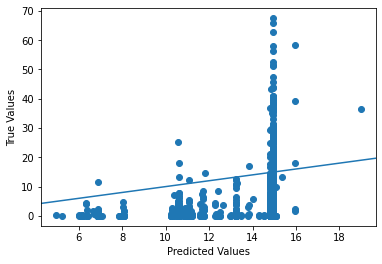

In [633]:
Y_predict = model.predict(X_test_n)

plt.scatter(Y_predict, Y_test)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_=plt.plot([-100,100],[-100,100])

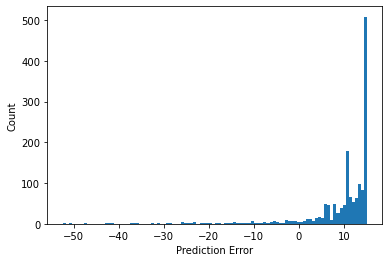

In [634]:
# histogram
error = Y_predict.reshape(1535,) - Y_test
plt.hist(error,bins = 100)
plt.xlabel("Prediction Error")
plt.ylabel("Count")
_=plt.ylabel("Count")

In [635]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_predict)

-1.2497153129050198

In [636]:
mse = mean_squared_error(Y_test, Y_predict)
print(f'the mse is {mse}')

the mse is 162.8974448852267


In [637]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(Y_test,Y_predict))

MAE: 11.837515555763867


In [638]:
def plot_feature_importance(importance, names):
    '''
    this code is from here: 
    https://www.analyseup.com/learn-python-for-data-science/python-random-forest-feature-importance-plot.html
    '''
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title('FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

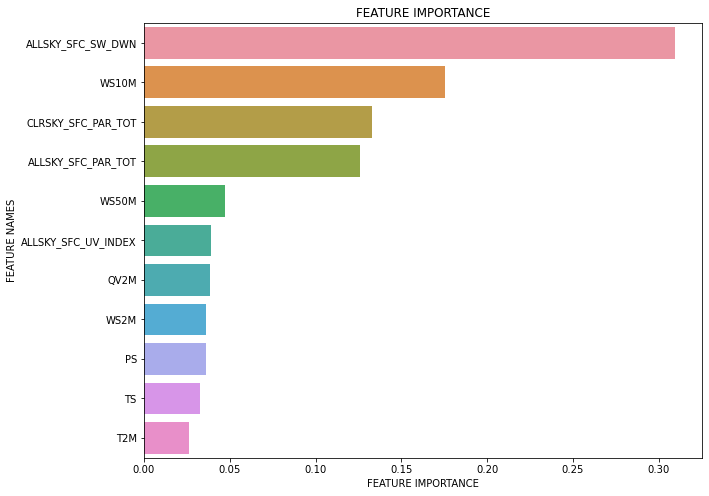

In [639]:
plot_feature_importance(model.feature_importances_, X.columns)